<a href="https://colab.research.google.com/github/Thiruloksundar/thirurep1/blob/main/CyberLabs_NN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the Data
train = pd.read_csv("/content/drive/MyDrive/emnist-letters-train.csv")
test = pd.read_csv("/content/drive/MyDrive/emnist-letters-test.csv")

In [ ]:
y1 = np.array(train.iloc[:,0].values)
x1 = np.array(train.iloc[:,1:].values)
y2 = np.array(test.iloc[:,0].values)
x2 = np.array(test.iloc[:,1:].values)

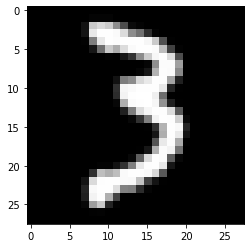

In [ ]:
z = x1.reshape(x1.shape[0],28,28)
plt.imshow(z[55,:,:],cmap='gray')

In [ ]:
X_train = x1.transpose()/255.0
Y_train = y1.reshape(1,y1.shape[0])-1
X_test = x2.transpose()/255.0
Y_test = y2.reshape(1,y2.shape[0])-1

In [ ]:
class NeuralNetwork:
  def init_params():
    W1 = np.random.rand(26, 784) - 0.5
    b1 = np.random.rand(26, 1) - 0.5
    W2 = np.random.rand(26, 26) - 0.5
    b2 = np.random.rand(26, 1) - 0.5
    return W1, b1, W2, b2

  def ReLU(Z):
      return np.maximum(Z, 0)

  def softmax(Z):
      A = np.exp(Z) / sum(np.exp(Z))
      return A
      
  def forward_prop(W1, b1, W2, b2, X):
      Z1 = W1.dot(X) + b1
      A1 = NeuralNetwork.ReLU(Z1)
      Z2 = W2.dot(A1) + b2
      A2 = NeuralNetwork.softmax(Z2)
      return Z1, A1, Z2, A2

  def ReLU_deriv(Z):
      return Z > 0

  def one_hot(Y):
      one_hot_Y = np.zeros((Y.size, Y.max() + 1))
      one_hot_Y[np.arange(Y.size), Y] = 1
      one_hot_Y = one_hot_Y.T
      return one_hot_Y

  def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
      m = X_train.shape[1]
      one_hot_Y = NeuralNetwork.one_hot(Y)
      dZ2 = A2 - one_hot_Y
      dW2 = 1 / m * dZ2.dot(A1.T)
      db2 = 1 / m * np.sum(dZ2)
      dZ1 = W2.T.dot(dZ2) * NeuralNetwork.ReLU_deriv(Z1)
      dW1 = 1 / m * dZ1.dot(X.T)
      db1 = 1 / m * np.sum(dZ1)
      return dW1, db1, dW2, db2

  def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
      W1 = W1 - alpha * dW1
      b1 = b1 - alpha * db1    
      W2 = W2 - alpha * dW2  
      b2 = b2 - alpha * db2    
      return W1, b1, W2, b2
  def get_predictions(A2):
      return np.argmax(A2, 0)

  def get_accuracy(predictions, Y):
      print(predictions, Y)
      return np.sum(predictions == Y) / Y.size

  def gradient_descent(X, Y, alpha, iterations):
      W1, b1, W2, b2 = NeuralNetwork.init_params()
      for i in range(iterations+1):
          Z1, A1, Z2, A2 = NeuralNetwork.forward_prop(W1, b1, W2, b2, X)
          dW1, db1, dW2, db2 = NeuralNetwork.backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
          W1, b1, W2, b2 = NeuralNetwork.update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
          if i % 100 == 0:
              print("Iteration: ", i)
              predictions = NeuralNetwork.get_predictions(A2)
              print(NeuralNetwork.get_accuracy(predictions, Y))
      return W1, b1, W2, b2
  
  def test_net(W1,b1,W2,b2,X,y):
    Z1, A1, Z2, A2 = NeuralNetwork.forward_prop(W1, b1, W2, b2, X)
    predictions = NeuralNetwork.get_predictions(A2)
    print(NeuralNetwork.get_accuracy(predictions, y)) 


In [ ]:
W1, b1, W2, b2 = NeuralNetwork.gradient_descent(X_train, Y_train, 1.0, 1000)

Iteration:  0
[14  5  5 ...  5 24  5] [[ 6 15 14 ...  0 22 11]]
0.05444881136048829
Iteration:  100
[ 6 15  2 ...  0 22  8] [[ 6 15 14 ...  0 22 11]]
0.520152253966824
Iteration:  200
[14 15 14 ...  0 22  8] [[ 6 15 14 ...  0 22 11]]
0.6291962747328236
Iteration:  300
[ 6 15 14 ...  0 22  8] [[ 6 15 14 ...  0 22 11]]
0.6657394790481875
Iteration:  400
[ 6 15 14 ...  0 22  8] [[ 6 15 14 ...  0 22 11]]
0.6918658993907589
Iteration:  500
[ 6 15 14 ...  0 22  8] [[ 6 15 14 ...  0 22 11]]
0.6938028581402944
Iteration:  600
[ 6 15 14 ...  0 22 11] [[ 6 15 14 ...  0 22 11]]
0.7304023693960517
Iteration:  700
[ 6 15 14 ...  0 22 11] [[ 6 15 14 ...  0 22 11]]
0.7226432730098312
Iteration:  800
[ 6 15 14 ...  0 22 11] [[ 6 15 14 ...  0 22 11]]
0.7416187119224316
Iteration:  900
[ 6 15 14 ...  0 22  8] [[ 6 15 14 ...  0 22 11]]
0.7612810955078323
Iteration:  1000
[ 6 15 14 ...  0 22 11] [[ 6 15 14 ...  0 22 11]]
0.7627563373461412


In [ ]:
NeuralNetwork.test_net(W1, b1, W2, b2, X_test, Y_test)

[ 7  0 16 ... 18 18 25] [[ 0  0  0 ... 18 18 18]]
0.7377525508480303
